# SARIMA Model : Data Analysis and Prediction

In [1]:
#import all the libraries we need

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import itertools
import statsmodels.api as sm
from sklearn import preprocessing

In [2]:
#show bigger plot

mpl.rcParams['figure.dpi'] = 100

In [3]:
#import the dataset we need 

daily_data = pd.read_csv('data/daily_data.csv')
hourly_data = pd.read_csv('data/hourly_data.csv')

### Study of the Seasonality : ACF Plots

#### daily_data.csv

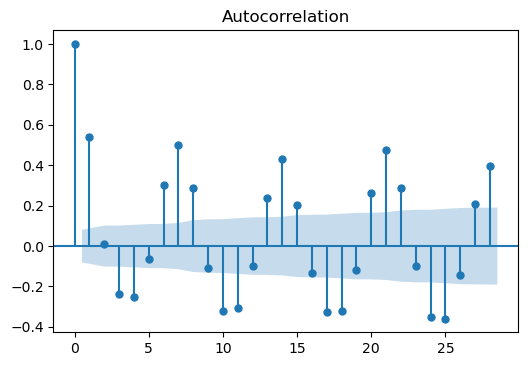

In [4]:
#we plot the acf for the daily

acf_daily = sm.graphics.tsa.plot_acf(daily_data['rooms_diff'].values.squeeze())

#### hourly_data.csv

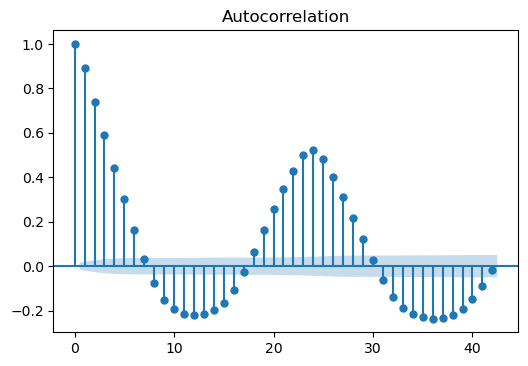

In [5]:
#we plot the acf for the hourly

acf_hourly = sm.graphics.tsa.plot_acf(hourly_data['rooms_diff'].values.squeeze())


### Rooms Consumption Prediction

#### daily_data.csv

In [6]:
#have a look to the data

daily_data.head()

,rooms_diff,machine_diff,cooling_diff,appliances_diff,rooms_diff_mean,machine_diff_mean,cooling_diff_mean,appliances_diff_mean,date,Day_of_week
0,309.656,842.075,322.437,3.364,0.215039,0.584774,0.223915,0.002336,2015-10-28,Wednesday
1,249.216,1025.887,315.117,3.079,0.173067,0.712422,0.218831,0.002138,2015-10-29,Thursday
2,326.864,898.475,309.797,1.550,0.226989,0.623941,0.215137,0.001076,2015-10-30,Friday
3,153.627,692.894,316.094,0.777,0.106685,0.481176,0.219510,0.000540,2015-10-31,Saturday
4,52.302,653.428,322.570,1.336,0.036321,0.453769,0.224007,0.000928,2015-11-01,Sunday


In [7]:
#we create an array of the data we want

x_array = np.array(daily_data['rooms_diff_mean'])

In [8]:
#we then normalize the data

normalized_arr = preprocessing.normalize([x_array])

In [9]:
#we add the normalize data into the dataset

daily_data['normalized_rooms_diff_mean'] = normalized_arr[0]

In [9]:
#obtain the best SARIMA model according to the data

p = range(0, 3)
d = range(1,2)
q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(daily_data['normalized_rooms_diff_mean'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 1, 1) x (0, 1, 1, 7)
SARIMAX: (0, 1, 1) x (0, 1, 2, 7)
SARIMAX: (0, 1, 2) x (1, 1, 0, 7)
SARIMAX: (0, 1, 2) x (1, 1, 1, 7)
ARIMA(0, 1, 0)x(0, 1, 0, 7)7 - AIC:-2818.276812727253


C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(0, 1, 1, 7)7 - AIC:-3123.212859447513
ARIMA(0, 1, 0)x(0, 1, 2, 7)7 - AIC:-3080.119186753507
ARIMA(0, 1, 0)x(1, 1, 0, 7)7 - AIC:-2959.3703568361207
ARIMA(0, 1, 0)x(1, 1, 1, 7)7 - AIC:-3119.667246938554
ARIMA(0, 1, 0)x(1, 1, 2, 7)7 - AIC:-3078.3642864810413


C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(2, 1, 0, 7)7 - AIC:-2986.2311206635145
ARIMA(0, 1, 0)x(2, 1, 1, 7)7 - AIC:-3083.1510994870387
ARIMA(0, 1, 0)x(2, 1, 2, 7)7 - AIC:-3076.1008296277605
ARIMA(0, 1, 1)x(0, 1, 0, 7)7 - AIC:-2865.9257272738737
ARIMA(0, 1, 1)x(0, 1, 1, 7)7 - AIC:-3175.4793356016257
ARIMA(0, 1, 1)x(0, 1, 2, 7)7 - AIC:-3132.8563314793255
ARIMA(0, 1, 1)x(1, 1, 0, 7)7 - AIC:-2993.7231671197387
ARIMA(0, 1, 1)x(1, 1, 1, 7)7 - AIC:-3173.3833744084645
ARIMA(0, 1, 1)x(1, 1, 2, 7)7 - AIC:-3132.840703101193
ARIMA(0, 1, 1)x(2, 1, 0, 7)7 - AIC:-3046.64894285179
ARIMA(0, 1, 1)x(2, 1, 1, 7)7 - AIC:-3136.943663137441


C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(2, 1, 2, 7)7 - AIC:-3128.697851072192
ARIMA(0, 1, 2)x(0, 1, 0, 7)7 - AIC:-2952.578830288237
ARIMA(0, 1, 2)x(0, 1, 1, 7)7 - AIC:-3246.0598526697786
ARIMA(0, 1, 2)x(0, 1, 2, 7)7 - AIC:-3202.667039187336


C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 2)x(1, 1, 0, 7)7 - AIC:-3083.936374331167
ARIMA(0, 1, 2)x(1, 1, 1, 7)7 - AIC:-3239.9531457075386
ARIMA(0, 1, 2)x(1, 1, 2, 7)7 - AIC:-3202.4115290978634
ARIMA(0, 1, 2)x(2, 1, 0, 7)7 - AIC:-3110.768575593928
ARIMA(0, 1, 2)x(2, 1, 1, 7)7 - AIC:-3216.5924726932317
ARIMA(0, 1, 2)x(2, 1, 2, 7)7 - AIC:-3197.2547308207477
ARIMA(1, 1, 0)x(0, 1, 0, 7)7 - AIC:-2842.3233744462204
ARIMA(1, 1, 0)x(0, 1, 1, 7)7 - AIC:-3142.1896228036485


C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(0, 1, 2, 7)7 - AIC:-3099.2204446568794
ARIMA(1, 1, 0)x(1, 1, 0, 7)7 - AIC:-2964.596448391637
ARIMA(1, 1, 0)x(1, 1, 1, 7)7 - AIC:-3140.14209383435
ARIMA(1, 1, 0)x(1, 1, 2, 7)7 - AIC:-3097.8104207019987
ARIMA(1, 1, 0)x(2, 1, 0, 7)7 - AIC:-2999.4068086141347
ARIMA(1, 1, 0)x(2, 1, 1, 7)7 - AIC:-3094.4734467669205


C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(2, 1, 2, 7)7 - AIC:-3094.2958654462363
ARIMA(1, 1, 1)x(0, 1, 0, 7)7 - AIC:-2973.0473510561296
ARIMA(1, 1, 1)x(0, 1, 1, 7)7 - AIC:-3254.892912294571
ARIMA(1, 1, 1)x(0, 1, 2, 7)7 - AIC:-3213.327873532179
ARIMA(1, 1, 1)x(1, 1, 0, 7)7 - AIC:-3092.226237588421
ARIMA(1, 1, 1)x(1, 1, 1, 7)7 - AIC:-3251.9516106696115
ARIMA(1, 1, 1)x(1, 1, 2, 7)7 - AIC:-3212.584452791877
ARIMA(1, 1, 1)x(2, 1, 0, 7)7 - AIC:-3122.6748655748825


C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(2, 1, 1, 7)7 - AIC:-3170.3683598593725


C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(2, 1, 2, 7)7 - AIC:-3206.8013507067108
ARIMA(1, 1, 2)x(0, 1, 0, 7)7 - AIC:-2968.2928932788313


C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 2)x(0, 1, 1, 7)7 - AIC:-3250.517199669871


C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 2)x(0, 1, 2, 7)7 - AIC:-3209.01752136175


C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 2)x(1, 1, 0, 7)7 - AIC:-3098.5008063324194
ARIMA(1, 1, 2)x(1, 1, 1, 7)7 - AIC:-3245.85366142113


C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 2)x(1, 1, 2, 7)7 - AIC:-3204.5976009326623


C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 2)x(2, 1, 0, 7)7 - AIC:-3124.0291047736587


C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 2)x(2, 1, 1, 7)7 - AIC:-3214.0018737593846


C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 2)x(2, 1, 2, 7)7 - AIC:-3198.3426436714913
ARIMA(2, 1, 0)x(0, 1, 0, 7)7 - AIC:-2876.085102196279
ARIMA(2, 1, 0)x(0, 1, 1, 7)7 - AIC:-3196.9156879338534
ARIMA(2, 1, 0)x(0, 1, 2, 7)7 - AIC:-3153.7672847019053
ARIMA(2, 1, 0)x(1, 1, 0, 7)7 - AIC:-3009.9815153461855
ARIMA(2, 1, 0)x(1, 1, 1, 7)7 - AIC:-3189.1571836711473


C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 0)x(1, 1, 2, 7)7 - AIC:-3153.085402974518
ARIMA(2, 1, 0)x(2, 1, 0, 7)7 - AIC:-3047.755844732676
ARIMA(2, 1, 0)x(2, 1, 1, 7)7 - AIC:-3142.5924292667105


C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 0)x(2, 1, 2, 7)7 - AIC:-3143.4708051901616
ARIMA(2, 1, 1)x(0, 1, 0, 7)7 - AIC:-2973.7876635708353


C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 1)x(0, 1, 1, 7)7 - AIC:-3254.1912982411545


C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 1)x(0, 1, 2, 7)7 - AIC:-3213.4797402226013
ARIMA(2, 1, 1)x(1, 1, 0, 7)7 - AIC:-3090.524329724315


C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 1)x(1, 1, 1, 7)7 - AIC:-3252.609696780445


C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 1)x(1, 1, 2, 7)7 - AIC:-3210.0212624879537
ARIMA(2, 1, 1)x(2, 1, 0, 7)7 - AIC:-3116.9449110743444


C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 1)x(2, 1, 1, 7)7 - AIC:-3207.107263249555


C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 1)x(2, 1, 2, 7)7 - AIC:-3199.219271490645


C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2)x(0, 1, 0, 7)7 - AIC:-2928.6900959170816


C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2)x(0, 1, 1, 7)7 - AIC:-3244.9620343608867


C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2)x(0, 1, 2, 7)7 - AIC:-3196.865201262826


C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2)x(1, 1, 0, 7)7 - AIC:-3085.7702875649625


C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2)x(1, 1, 1, 7)7 - AIC:-3241.6055874107924


C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2)x(1, 1, 2, 7)7 - AIC:-3200.9333232713293


C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2)x(2, 1, 0, 7)7 - AIC:-3108.493876067205


C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(2, 1, 2)x(2, 1, 1, 7)7 - AIC:-3007.67250773032
ARIMA(2, 1, 2)x(2, 1, 2, 7)7 - AIC:-3188.0544403326485


C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [10]:
#we apply the model with the best parameters

my_order = (2, 1, 2)
my_seasonal_order = (2, 1, 2, 7)
model = sm.tsa.statespace.SARIMAX(daily_data['normalized_rooms_diff_mean'], order=my_order, seasonal_order=my_seasonal_order)
model_fit = model.fit(method = 'powell')
print(results.summary().tables[1])

Optimization terminated successfully.
         Current function value: -2.828083
         Iterations: 7
         Function evaluations: 933
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8137      0.360      2.260      0.024       0.108       1.519
ar.L2         -0.2447      0.161     -1.520      0.128      -0.560       0.071
ma.L1         -1.2617      0.359     -3.513      0.000      -1.966      -0.558
ma.L2          0.3231      0.334      0.966      0.334      -0.332       0.979
ar.S.L7       -0.6564      0.204     -3.213      0.001      -1.057      -0.256
ar.S.L14      -0.0693      0.046     -1.495      0.135      -0.160       0.022
ma.S.L7       -0.3890      0.210     -1.855      0.064      -0.800       0.022
ma.S.L14      -0.6469      0.209     -3.090      0.002      -1.057      -0.237
sigma2         0.0002   8.94e-06     19.659      0.000       0.000     

C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


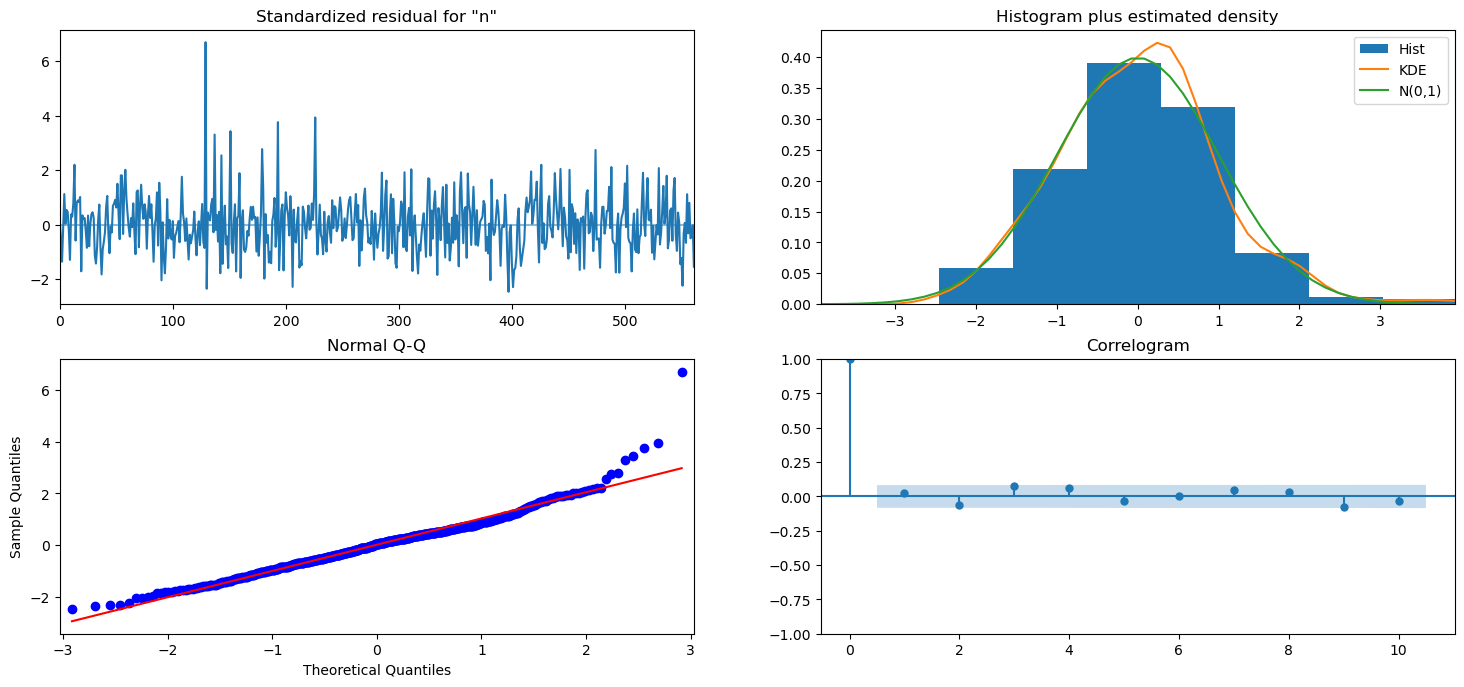

In [11]:
#we check the distribution

results.plot_diagnostics(figsize=(18, 8))
plt.show()

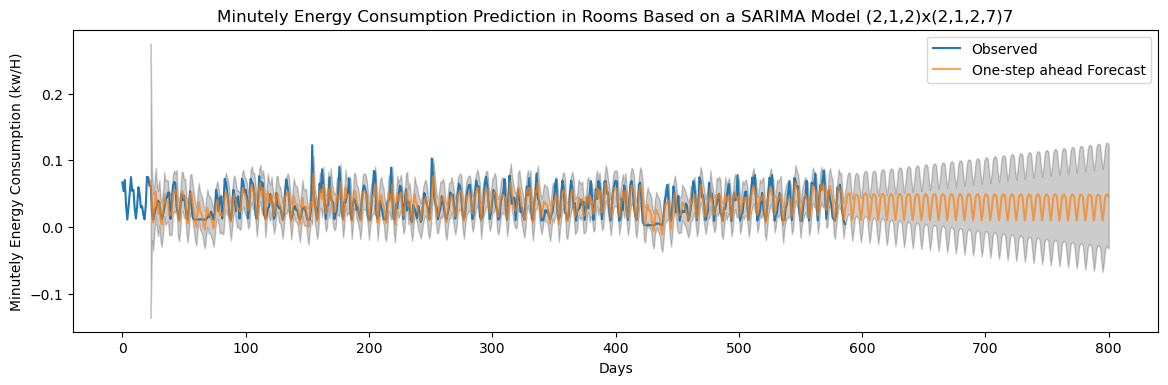

In [27]:
#we predict on one-step

pred = results.get_prediction(start=23, end = 800, dynamic=False)
pred_ci = pred.conf_int()
ax = daily_data['normalized_rooms_diff_mean'].plot(label='Observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 4))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Days')
ax.set_ylabel('Minutely Energy Consumption (kw/H)')
ax.set_title('Minutely Energy Consumption Prediction in Rooms Based on a SARIMA Model (2,1,2)x(2,1,2,7)7')
plt.legend()
plt.show()

In [13]:
#we evaluate the model

y_forecasted = pred.predicted_mean
y_truth = daily_data['normalized_rooms_diff_mean'][23:800]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error (MSE) is {}'.format(mse))
print('The Root Mean Squared Error (RMSE) is {}'.format(np.sqrt(mse), 2))

The Mean Squared Error (MSE) is 0.00019375067603385178
The Root Mean Squared Error (RMSE) is 0.013919435190906698


### Creation of the Prediction Function

In [23]:
#creation of a function that predicts the consumption of CO2 based on a SARIMA model 

def sarima_prediction_daily(data, number):

    #parameters of the SARIMA model

    my_order = (2, 1, 2)
    my_seasonal_order = (2, 1, 2, 7)

    #creation of the model based on the parameters

    model = sm.tsa.statespace.SARIMAX(data, order=my_order, seasonal_order=my_seasonal_order)
    model_fit = model.fit(method = 'powell')

    #forcasting for a certain number of days 
    
    yhat = model_fit.forecast(number) 
    result = np.array(yhat)

    return result

In [24]:
#example : we want to predict the consumption of CO2 in the rooms for the 50 next days

sarima_prediction_daily(daily_data['rooms_diff_mean'], 50)

Optimization terminated successfully.
         Current function value: -1.676029
         Iterations: 8
         Function evaluations: 1008


array([0.11228621, 0.14670218, 0.15220067, 0.13953133, 0.07939083,
       0.03466298, 0.07339931, 0.14267743, 0.16070142, 0.15868731,
       0.14987915, 0.08611309, 0.03580996, 0.07865695, 0.14427367,
       0.1606489 , 0.15566004, 0.14355539, 0.08295059, 0.0357719 ,
       0.07953682, 0.14560205, 0.1618813 , 0.15851769, 0.14918078,
       0.08591114, 0.03594633, 0.07934016, 0.14478245, 0.16100521,
       0.15618767, 0.14451271, 0.08349315, 0.03586674, 0.07961111,
       0.14555677, 0.16181452, 0.15821687, 0.14851562, 0.08559651,
       0.03599471, 0.07944658, 0.1449652 , 0.16119225, 0.15656404,
       0.14519653, 0.08388106, 0.03594682, 0.07964594, 0.14552488])